<a href="https://colab.research.google.com/github/Jastej786/ModernPortfolioTheory/blob/main/PythonForFinance_MordernPortfolioTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [144]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf
from google.colab import  drive
import yfinance as yf

FUNCTION THAT SAVES STOCK DATA TO CSV FILE

In [145]:
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [146]:
def save_to_csv_from_yahoo(ticker,syear, smonth, sday, eyear,emonth,eday):
  start = dt.datetime(syear,smonth,sday)
  end = dt.datetime(eyear,emonth,eday)

  df = yf.download(ticker,start,end)
  df.to_csv('/drive/My Drive/Colab_Notebooks/Modern_Portfolio_Theory/Data/'+ticker+'.csv')
  return df

In [147]:
save_to_csv_from_yahoo('AMZN',2020,1,1,2024,1,1).head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


Function that returns data from CSV File

In [148]:
def get_df_from_csv(ticker):
  try:
    df = pd.read_csv('/drive/My Drive/Colab_Notebooks/Modern_Portfolio_Theory/Data/'+ticker+'.csv')
    return df
  except FileNotFoundError:
    print('File not found')

In [149]:
AMZN = get_df_from_csv('AMZN')
AMZN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000


In [150]:
get_df_from_csv('LNT')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,54.680000,54.770000,53.389999,53.630001,46.559380,1387300
1,2020-01-03,53.669998,54.349998,53.560001,53.799999,46.706963,976100
2,2020-01-06,53.799999,54.119999,53.549999,53.750000,46.663555,2585200
3,2020-01-07,53.650002,53.840000,53.320000,53.799999,46.706963,1815100
4,2020-01-08,53.820000,54.080002,53.650002,53.919998,46.811142,1504300
...,...,...,...,...,...,...,...
1001,2023-12-22,51.000000,51.529999,50.730000,50.939999,49.954670,1468500
1002,2023-12-26,50.680000,51.279999,50.680000,50.930000,49.944862,799900
1003,2023-12-27,50.869999,51.049999,50.650002,50.840000,49.856602,1244700
1004,2023-12-28,50.730000,51.450001,50.630001,51.320000,50.327320,1175600


ADD DAILY RETURNS TO DATAFRAME

In [151]:
def add_daily_returns_to_df(df, ticker):
  df['daily_returns'] = df['Adj Close'].pct_change()
  df.to_csv('/drive/My Drive/Colab_Notebooks/Modern_Portfolio_Theory/Data/'+ticker+'.csv')
  return df

In [152]:
save_to_csv_from_yahoo('AAPL',2020,1,1,2024,1,1)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960480,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484329,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542816,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [153]:
AAPL = get_df_from_csv('AAPL')
add_daily_returns_to_df(AAPL,'AAPL').head()

,Date,Open,High,Low,Close,Adj Close,Volume,daily_returns
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960480,135480400,NaN
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800,-0.009722
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200,0.007968
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484329,108872000,-0.004703
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200,0.016086


dates in df are in string format

In [154]:
type(AAPL['Date'][0])

str

Total Returns Over a Time Period

In [155]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])

    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)

    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_returns'].mean()

    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

In [156]:
add_daily_returns_to_df(AMZN,'AMZN')

,Date,Open,High,Low,Close,Adj Close,Volume,daily_returns
0,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,NaN
1,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,-0.012139
2,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.014886
3,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.002092
4,2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,-0.007809
...,...,...,...,...,...,...,...,...
1001,2023-12-22,153.770004,154.350006,152.710007,153.419998,153.419998,29480100,-0.002730
1002,2023-12-26,153.559998,153.979996,153.029999,153.410004,153.410004,25067200,-0.000065
1003,2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700,-0.000456
1004,2023-12-28,153.720001,154.080002,152.949997,153.380005,153.380005,27057000,0.000261


In [157]:
get_return_defined_time(AMZN,2021,1,1,2024,1,1)

0.13936048362358766

Simple Price Plot

In [158]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv('/drive/My Drive/Colab_Notebooks/Modern_Portfolio_Theory/Data/'+ticker+'.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:

        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])

        # Define to only use data between provided dates
        df_sub = df.loc[start:end]

        # Convert to Numpy array
        df_np = df_sub.to_numpy()

        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]

        # Get date from the 1st
        date_arr = df_np[:,1]

        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])

        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')

        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))

        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))

        # Set grid background color
        axes.set_facecolor('#FAEBD7')

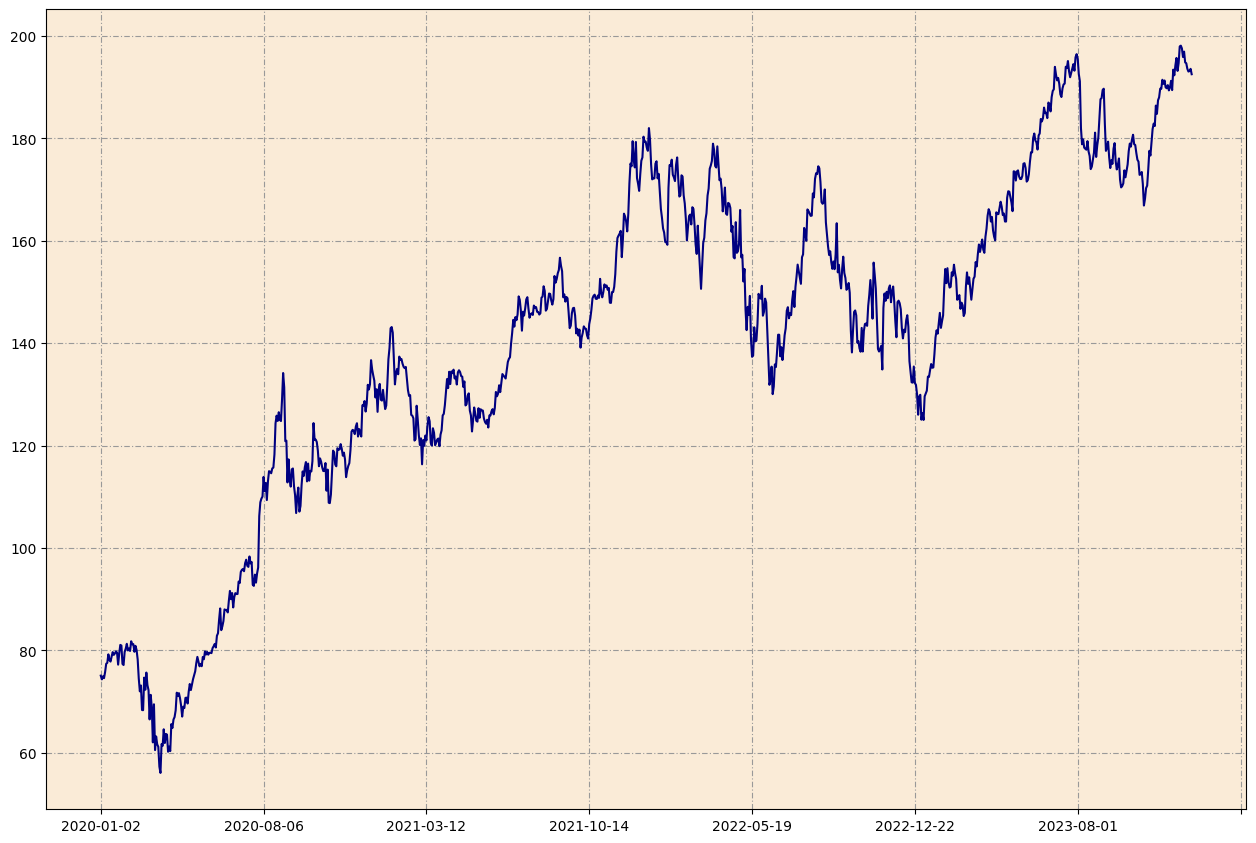

In [159]:
price_plot('AAPL',2020,1,1,2024,1,1)

Download Multiple Stocks

In [160]:
tickers = ["LNT", "AAPL", "NFLX", "GOOG"]

In [161]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

In [162]:
download_multiple_stocks(2020,1,1,2024,1,1, *tickers)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Merge Multiple Stocks in One Dataframe by Column Name

In [163]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()

    start = dt.datetime(syear,smonth,sday)
    end = dt.datetime(eyear,emonth,eday)

    for x in tickers:
        mult_df[x] = yf.download(x, start, end)[col_name]

    return mult_df

In [164]:
mult_df = merge_df_by_column_name('Close',2020,1,1,2024,1,1,*tickers)
mult_df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,LNT,AAPL,NFLX,GOOG
Date,,,,
2020-01-02,53.630001,75.087502,329.809998,68.368500
2020-01-03,53.799999,74.357498,325.899994,68.032997
2020-01-06,53.750000,74.949997,335.829987,69.710503
2020-01-07,53.799999,74.597504,330.750000,69.667000
2020-01-08,53.919998,75.797501,339.260010,70.216003


Get Changing Value of Investment using Multiple Stocks

In [165]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

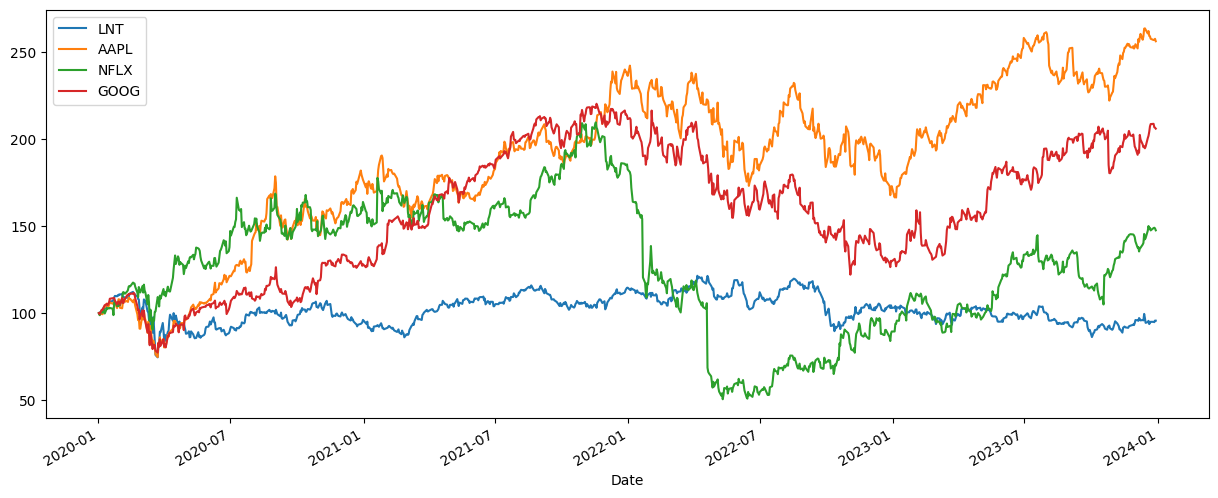

In [166]:
plot_return_mult_stocks(100, mult_df)

Get Standard Deviation for Multiple Stocks

In [167]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [168]:
get_stock_mean_sd(mult_df, 'AAPL')

(140.80813123881225, 33.31385702299744)

In [169]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

In [170]:
get_mult_stock_mean_sd(mult_df)

Stock: LNT  Mean:   54.66 Standard deviation: 4.35
Coefficient of Variation: 0.0795829479417617

Stock: AAPL Mean:  140.81 Standard deviation: 33.31
Coefficient of Variation: 0.2365904350118584

Stock: NFLX Mean:  420.20 Standard deviation: 120.83
Coefficient of Variation: 0.2875504962156048

Stock: GOOG Mean:  108.54 Standard deviation: 25.43
Coefficient of Variation: 0.23433909905367753



#Markowitz Portfolio Optimization

Harry Markowitz proved that you could make what is called an efficient portfolio. That is a portfolio that optimizes return while also minimizing risk. We don't benefit from analyzing individual securities at the same rate as if we instead considered a portfolio of stocks.

We do this by creating portfolios with stocks that are not correlated. We want to calculate expected returns by analyzing the returns of each stock multiplied by its weight.

The standard deviation of the portfolio is found this way. Sum multiple calculations starting by finding the product of the first securities weight squared times its standard deviation squared. The middle is 2 times the correlation coefficient between the stocks. And, finally add those to the weight squared times the standard deviation squared for the second security.



In [171]:
risk_free_rate = 0.0125

# Plotting an Efficient frontier

In [172]:
port_list = ["GNRC", "DXCM", "AMD", "NFLX", "COST", "TGT", "AES", "MSCI",
             "NEM", "AMT", "HES"]

In [173]:
mult_df = merge_df_by_column_name('Adj Close',  2018,1,1,
                                  2024,1,1, *port_list)
mult_df.head(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
Date,,,,,,,,,,,
2018-01-02,48.029999,14.4975,10.98,201.070007,170.075958,57.349476,8.811602,119.588310,31.117672,120.937561,43.237484
2018-01-03,49.730000,14.5200,11.55,205.050003,172.117004,56.959396,8.803501,121.405373,30.856716,121.408844,44.638077
2018-01-04,50.070000,13.0625,12.12,205.630005,170.780365,55.840050,8.771104,123.316101,31.199207,119.635025,45.713348
2018-01-05,50.410000,13.3150,11.88,209.990005,169.561203,56.433647,8.803501,124.599251,31.313377,120.406273,47.132015
2018-01-08,49.529999,13.8600,12.28,212.050003,170.220474,56.967869,8.803501,124.767876,31.280746,121.691635,47.430214
2018-01-09,48.349998,13.6500,11.82,209.309998,168.242630,58.629929,8.714411,125.601418,31.076889,120.869011,47.403095
2018-01-10,47.389999,14.6500,11.96,212.520004,167.456879,59.978222,8.730609,125.273643,31.264442,117.921188,47.891037
2018-01-11,49.020000,14.5550,12.14,217.240005,171.033234,62.751152,8.876391,126.219604,31.672165,115.658890,49.445244
2018-01-12,49.270000,14.1875,12.02,221.229996,173.254929,65.125549,8.941181,127.277985,32.446842,113.970772,49.282604


<Axes: xlabel='Date'>

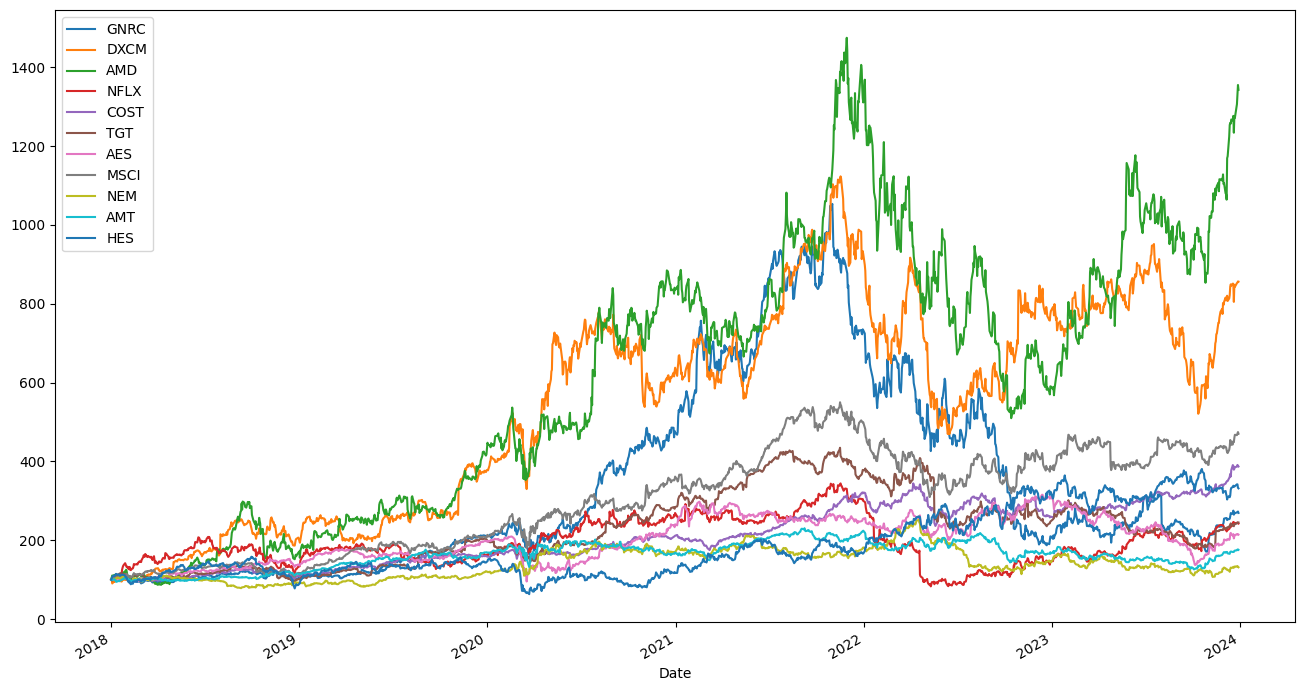

In [174]:
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16, 9))

Mean Returns

In [175]:
returns = np.log(mult_df / mult_df.shift(1))
mean_ret = returns.mean() * 252 # 252 average trading days per year
mean_ret

GNRC    0.165412
DXCM    0.358788
AMD     0.434005
NFLX    0.147785
COST    0.226105
TGT     0.149625
AES     0.127247
MSCI    0.258660
NEM     0.045357
AMT     0.093955
HES     0.200239
dtype: float64

Covarience

In [176]:
returns.cov() * 252

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,0.243335,0.073751,0.113450,0.073628,0.044860,0.061159,0.070629,0.081655,0.029422,0.050892,0.066054
DXCM,0.073751,0.228331,0.097423,0.072731,0.036145,0.039435,0.049866,0.080230,0.019834,0.037626,0.042104
AMD,0.113450,0.097423,0.302573,0.113094,0.053558,0.061417,0.056328,0.099118,0.029523,0.043643,0.067644
NFLX,0.073628,0.072731,0.113094,0.223979,0.041341,0.041795,0.037022,0.070114,0.016974,0.029359,0.038053
COST,0.044860,0.036145,0.053558,0.041341,0.055423,0.041677,0.028359,0.040117,0.012238,0.028518,0.021074
TGT,0.061159,0.039435,0.061417,0.041795,0.041677,0.117344,0.041164,0.042000,0.013614,0.031815,0.038512
AES,0.070629,0.049866,0.056328,0.037022,0.028359,0.041164,0.130943,0.059538,0.026150,0.044044,0.072775
MSCI,0.081655,0.080230,0.099118,0.070114,0.040117,0.042000,0.059538,0.120288,0.023955,0.048190,0.054238
NEM,0.029422,0.019834,0.029523,0.016974,0.012238,0.013614,0.026150,0.023955,0.111769,0.024722,0.027641
AMT,0.050892,0.037626,0.043643,0.029359,0.028518,0.031815,0.044044,0.048190,0.024722,0.080199,0.029548


Correlation

In [177]:
returns.corr()

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,1.000000,0.312885,0.418108,0.315384,0.386288,0.361930,0.395676,0.477275,0.178404,0.364304,0.272289
DXCM,0.312885,1.000000,0.370649,0.321615,0.321308,0.240917,0.288390,0.484108,0.124158,0.278053,0.179171
AMD,0.418108,0.370649,1.000000,0.434430,0.413583,0.325943,0.282987,0.519549,0.160538,0.280165,0.250062
NFLX,0.315384,0.321615,0.434430,1.000000,0.371046,0.257807,0.216179,0.427161,0.107278,0.219059,0.163498
COST,0.386288,0.321308,0.413583,0.371046,1.000000,0.516793,0.332899,0.491334,0.155493,0.427755,0.182025
TGT,0.361930,0.240917,0.325943,0.257807,0.516793,1.000000,0.332079,0.353515,0.118873,0.327959,0.228613
AES,0.395676,0.288390,0.282987,0.216179,0.332899,0.332079,1.000000,0.474402,0.216160,0.429793,0.408952
MSCI,0.477275,0.484108,0.519549,0.427161,0.491334,0.353515,0.474402,1.000000,0.206595,0.490642,0.318001
NEM,0.178404,0.124158,0.160538,0.107278,0.155493,0.118873,0.216160,0.206595,1.000000,0.261123,0.168125
AMT,0.364304,0.278053,0.280165,0.219059,0.427755,0.327959,0.429793,0.490642,0.261123,1.000000,0.212166


Generate Random Weights Equal to 1

In [178]:
# Generate 11 random values that sum to 1
weights = np.random.random(11)
weights /= np.sum(weights)
print('Weights :', weights)
print('Total Weight :', np.sum(weights))

Weights : [0.14920727 0.01065193 0.15168979 0.15827318 0.11663684 0.02026193
 0.04005568 0.03476462 0.13146132 0.15898515 0.02801228]
Total Weight : 0.9999999999999999


Calculating Return of Portfolio

In [179]:
# Provide return of portfolio using random weights over the whole dataset
np.sum(weights * returns.mean()) * 252

0.18772931458182793

Calculating Volatility

In [180]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.2570317101802396

Analyzing Returns & Risks of 10000 Combinations

In [181]:
p_ret = [] # Returns list
p_vol = [] # Volatility list
p_SR = [] # Sharpe Ratio list
p_wt = [] # Stock weights list


for x in range(10000):
    # Generate random weights
    p_weights = np.random.random(11)
    p_weights /= np.sum(p_weights)

    # Add return using those weights to list
    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)

    # Add volatility or standard deviation to list
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    p_vol.append(vol_1)

    # Get Sharpe ratio
    SR_1 = (ret_1 - risk_free_rate) / vol_1
    p_SR.append(SR_1)

    # Store the weights for each portfolio
    p_wt.append(p_weights)

# Convert to Numpy arrays
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

p_ret, p_vol, p_SR, p_wt

(array([0.20222371, 0.2010123 , 0.21698556, ..., 0.21517833, 0.20697837,
        0.19896571]),
 array([0.24069938, 0.2437979 , 0.27827854, ..., 0.26210024, 0.25311296,
        0.25996724]),
 array([0.78821854, 0.77323182, 0.73482331, ..., 0.77328556, 0.76834614,
        0.71726619]),
 array([[0.02605808, 0.03430573, 0.14195441, ..., 0.13184909, 0.10774805,
         0.12756904],
        [0.06914375, 0.0521194 , 0.13665826, ..., 0.0828042 , 0.11779006,
         0.01669235],
        [0.09785176, 0.00682577, 0.16278329, ..., 0.01055156, 0.0760411 ,
         0.08864834],
        ...,
        [0.1509646 , 0.14540871, 0.10358733, ..., 0.11894095, 0.02704949,
         0.16093124],
        [0.07581607, 0.09796454, 0.08587644, ..., 0.04641043, 0.17622098,
         0.14014142],
        [0.1356083 , 0.10584946, 0.08516487, ..., 0.12015489, 0.00344724,
         0.05730624]]))

Plotting the Efficient Frontier

<Axes: xlabel='Volatility', ylabel='Return'>

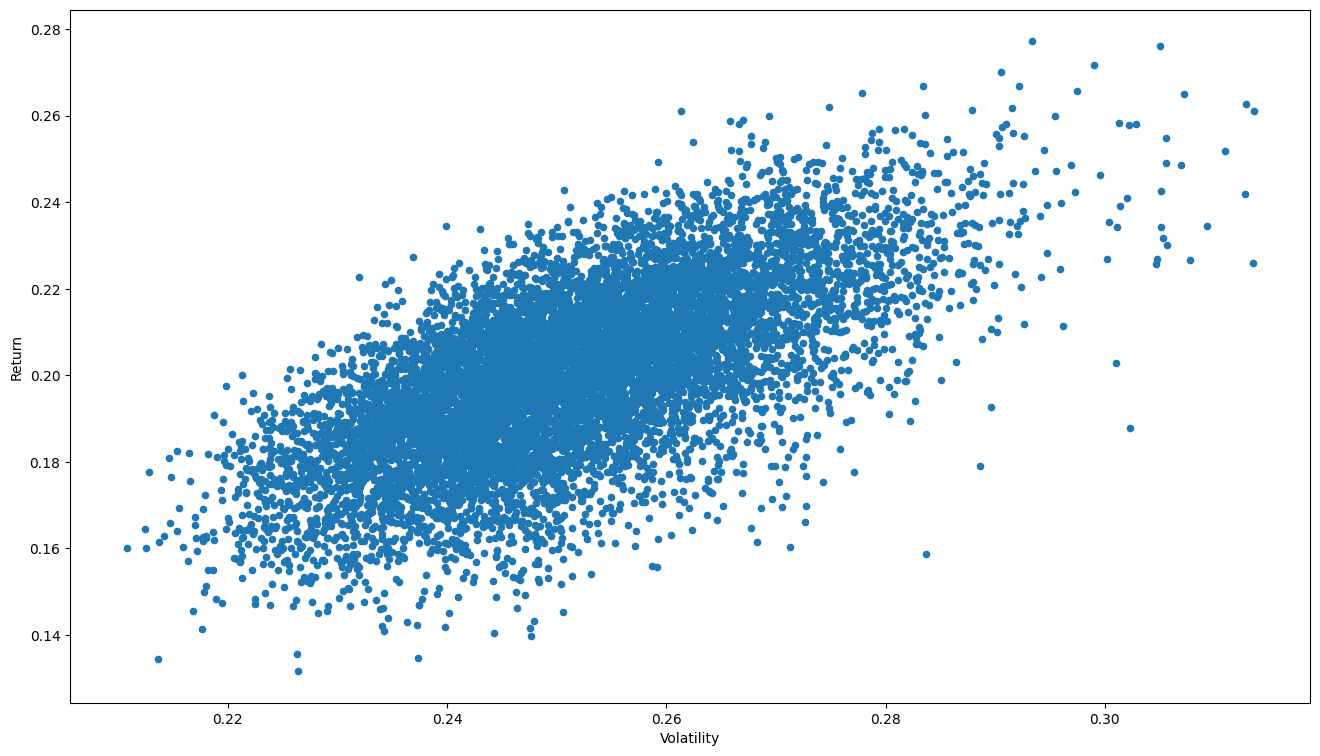

In [182]:
# Create a dataframe with returns and volatility
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))

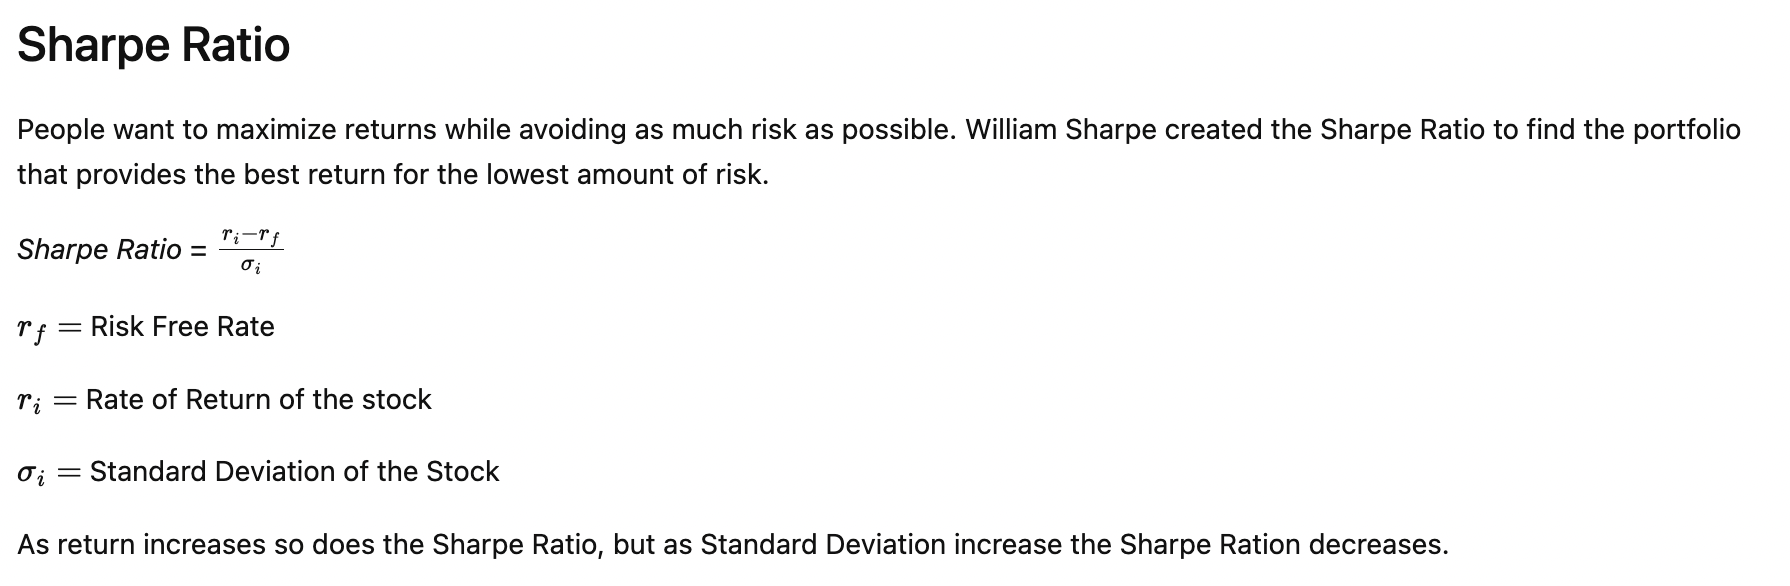

In [183]:
# Return the index of the largest Sharpe Ratio
SR_idx = np.argmax(p_SR)

# Find the ideal portfolio weighting at that index
i = 0
while i < 11:
    print("Stock : %s : %2.2f" % (port_list[i], (p_wt[4296][i] * 100)))
    i += 1

# Find volatility of that portfolio
print("\nVolatility :", p_vol[4296])

# Find return of that portfolio
print("Return :", p_ret[4296])

Stock : GNRC : 5.82
Stock : DXCM : 15.24
Stock : AMD : 4.54
Stock : NFLX : 10.22
Stock : COST : 9.82
Stock : TGT : 13.36
Stock : AES : 7.55
Stock : MSCI : 6.94
Stock : NEM : 3.75
Stock : AMT : 14.52
Stock : HES : 8.25

Volatility : 0.2409553137376388
Return : 0.2006892170583389


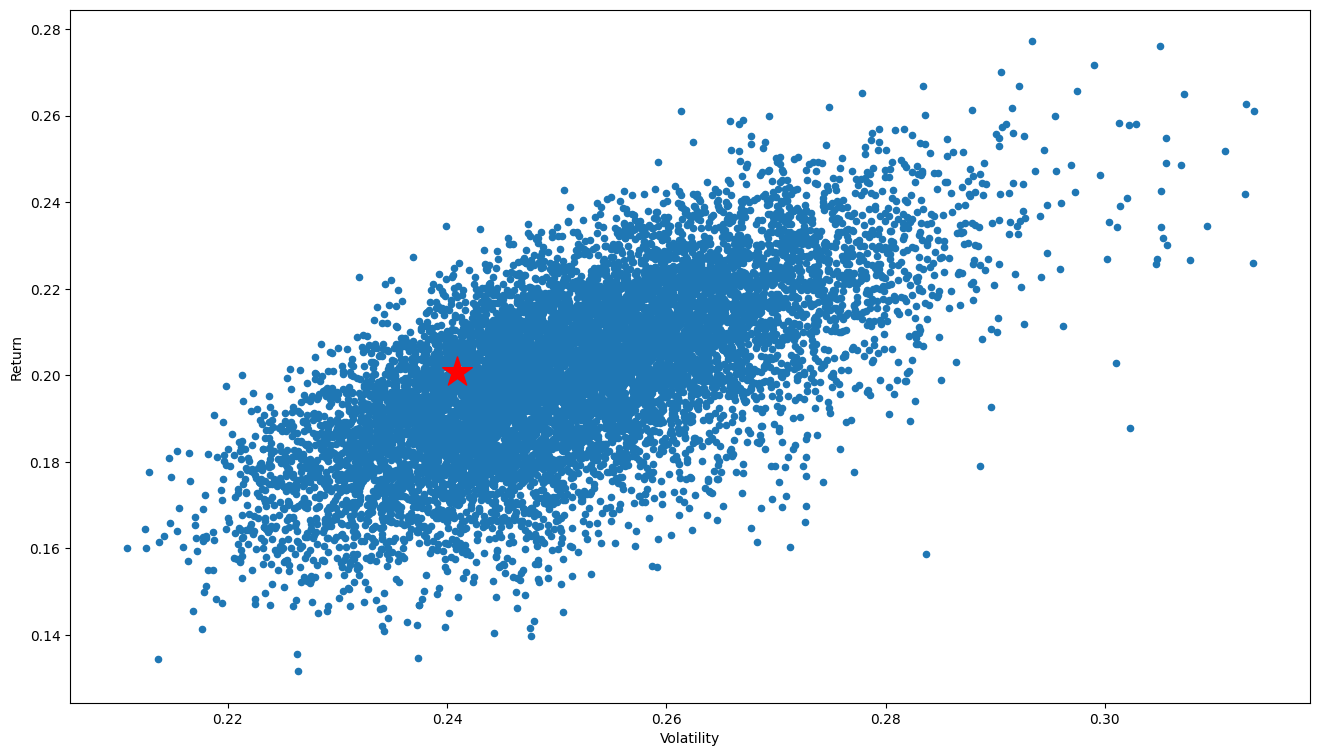

In [186]:
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(16, 9))
plt.scatter(x=0.2409553137376388,y=0.2006892170583389,\
 color='r', marker='*', s=500)